## Introduction
Convolutional neural networks (CNNs) are similar to neural networks to the extent that both are made up of neurons, which need to have their weights and biases optimized. The main difference between the two is that CNNs make the explicit assumption that the inputs are images, which allows us to incorporate certain properties into the architecture. These properties make the forward propagation step much more efficient and reduce the number of parameters needed in the network. This makes CNNs the best choice for solving problems related to image recognition, object detection, and other computer vision applications.
In this guide, you will learn how to build CNNs using the keras library. Let's start by loading the required libraries and packages.


In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

## Data

We will use the popular MNIST dataset in this guide. Each image in the dataset has dimensions of 28x28 pixels and contains a centered, grayscale digit. The model will take the image as input, and it will output one of the ten possible digits (0 through 9). There are 70,000 images in the data, of which 60,000 will be used for training the model and the remaining 10,000 for validating the model.
The first line of code below loads the MNIST dataset and creates the training and test arrays. The second line of code checks the shape of the second image in the training set. The result is a 28x28 pixel shape, which was expected.


In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape[1]

28

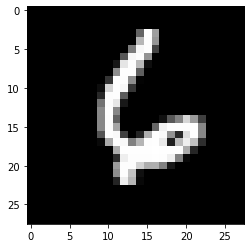

In [3]:
plt.imshow(X_train[59000],cmap='gray')
plt.show()

## Data Preparation

CNNs identify images using pixels that are often related. However, before training the algorithm, we need to prepare the data. The first step is to reshape the inputs — X_train and X_test — as done in the first two lines of code below. The reshape function performs this task, taking in three arguments. The first argument is the number of images, shown as X_train.shape[0]. The second argument is the shape of each image (28x28), while the third argument is 1 because the images are greyscale.
The next step is normalization of the inputs to make it easier for the network to train. The third and fourth lines of code normalize the image pixel values from 0, 255 to 0,1.
Finally, we perform the one-hot-encoding of the target variable. This is done in the fifth and sixth lines of code below. The last two lines of code print the training, test shape and number of classes in the target variable.


In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
import numpy as np
X_train=X_train.reshape((X_train.shape[0],28,28,1)).astype('float32')
X_test=X_test.reshape((X_test.shape[0],28,28,1)).astype('float32')

X_train=X_train/255
X_test=X_test/255

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_classes=y_test.shape[1]
print(X_train.shape)
print(X_test.shape)
print(num_classes)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
10


In [6]:
y_train.shape

(60000, 10)

## Building the model

We will create a function to train the CNN model, which is defined as cnn_model below. The first line of code below calls for the Sequential constructor because the model type we are building is sequential in nature. From the second line of code onwards, we start using the add() function to add layers to the model.
The first layer is a Conv2D layer that will deal with the input images, represented as two-dimensional matrices. There are 32 nodes in this layer, which has a kernel size of 5, and the activation function is relu, or Rectified Linear Activation. ReLu is the most widely used activation function in deep neural networks because of its advantages in being nonlinear as well as having the ability to not activate all the neurons at the same time. In simple terms, this means that at a time, only a few neurons are activated, making the network sparse and very efficient.
The next step is to add a pooling layer, MaxPooling2D, followed by a regularization layer called Dropout. Between the dropout and the dense layers, there is the Flatten layer, which converts the 2D matrix data to a vector. This in turn allows the output to be processed by standard, fully connected layers.
The next step is to add the fully connected dense layer with 128 neurons and the rectifier activation function. Next, we add the output layer, which has 10 neurons for the 10 classes and a softmax activation function. This activation function generates probability-like predictions for each class.
The final step is to compile the model, which takes three parameters: optimizer, loss, and metrics. The optimizer controls the learning rate, which will be the adam optimizer in our case. The main advantage of the adam optimizer is that we don't need to specify the learning rate as is the case with gradient descent, thereby saving us the task of optimizing the learning rate for our model. We will use the categorical_crossentropy loss function, which is the common choice for classification problems. In simple terms, the lower the score, the better the model. The evaluation metric we will use to validate the model performance on the test data is the accuracy metric. The higher the accuracy score, the better the model performance.

In [7]:
cnn_model=Sequential()
cnn_model.add(Conv2D(32,(5,5),input_shape=X_train.shape[1:],activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
#cnn_model.add(Conv2D(16,(5,5),activation='relu'))
#cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dense(10,activation='softmax'))

In [8]:
cnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Fitting and Evaluating the model

The first line of code below fits the model on the training data. We also provide the argument, epochs, which represents the number of training iterations. We have considered 5 epochs and the batch size of 150. The second line uses the model.evaluate() function to evaluate the model on the test data, while the third line prints the error and the accuracy score.


In [9]:
cnn_model.fit(X_train,y_train,epochs=5,batch_size=150)

Epoch 1/5
400/400 [==============================] - 21s 52ms/step - loss: 0.2511 - accuracy: 0.9262
Epoch 2/5
400/400 [==============================] - 21s 52ms/step - loss: 0.0887 - accuracy: 0.9732
Epoch 3/5
400/400 [==============================] - 21s 51ms/step - loss: 0.0656 - accuracy: 0.9798
Epoch 4/5
400/400 [==============================] - 21s 52ms/step - loss: 0.0515 - accuracy: 0.9846
Epoch 5/5
400/400 [==============================] - 22s 54ms/step - loss: 0.0429 - accuracy: 0.9863


In [10]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0380 - accuracy: 0.9872


[0.03798003867268562, 0.9872000217437744]

## Conclusion
In this guide, you have learned how to build a simple convolutional neural network using the high-performing deep learning library keras. You also learned about the different parameters that can be tuned depending on the problem statement and the data.
